In [1]:
!pip install librosa numpy scikit-learn tensorflow joblib

import numpy as np
import librosa

In [2]:
# Function to extract features from audio
def extract_features_from_audio(y, sr, fixed_length=40):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=fixed_length)
    mfccs = np.mean(mfccs.T, axis=0)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma = np.mean(chroma.T, axis=0)

    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel = np.mean(mel.T, axis=0)

    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    contrast = np.mean(contrast.T, axis=0)

    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    tonnetz = np.mean(tonnetz.T, axis=0)

    zcr = librosa.feature.zero_crossing_rate(y)
    zcr = np.mean(zcr.T, axis=0)

    rmse = librosa.feature.rms(y=y)
    rmse = np.mean(rmse.T, axis=0)

    # Function to pad or trim features to the fixed length
    def pad_or_trim(feature, length):
        if len(feature) < length:
            return np.pad(feature, (0, length - len(feature)), mode='constant')
        else:
            return feature[:length]

    # Apply padding or trimming to each feature to ensure the fixed length
    mfccs = pad_or_trim(mfccs, fixed_length)
    chroma = pad_or_trim(chroma, fixed_length)
    mel = pad_or_trim(mel, fixed_length)
    contrast = pad_or_trim(contrast, fixed_length)
    tonnetz = pad_or_trim(tonnetz, fixed_length)
    zcr = pad_or_trim(zcr, fixed_length)
    rmse = pad_or_trim(rmse, fixed_length)

    # Concatenate all features into a single feature vector
    return np.concatenate([mfccs, chroma, mel, contrast, tonnetz, zcr, rmse])

In [ ]:
# Save CNN model in the recommended .keras format
cnn_model.save('cnn_model.keras')

# Save SVM, RF, and Meta Learner using joblib
import joblib
joblib.dump(svm_model_no_tuning, 'svm_model.pkl')
joblib.dump(rf_model_no_tuning, 'rf_model.pkl')
joblib.dump(meta_learner, 'meta_learner.pkl')

joblib.dump(scaler, 'scaler.pkl')

In [3]:
from tensorflow.keras.models import load_model

# Load CNN model in .keras format
cnn_model = load_model('cnn_model.keras')

import joblib
# Load SVM, RF, and Meta Learner
svm_model_no_tuning = joblib.load('svm_model.pkl')
rf_model_no_tuning = joblib.load('rf_model.pkl')
meta_learner = joblib.load('meta_learner.pkl')

scaler = joblib.load('scaler.pkl')

In [ ]:
# Melihat arsitektur dari CNN model
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 278, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 139, 1, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 139, 1, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 137, 1, 64)          │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 68, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 68, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 66, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 33, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 33, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4224)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         540,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,472 (6.65 MB)

 Trainable params: 580,674 (2.22 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,161,350 (4.43 MB)

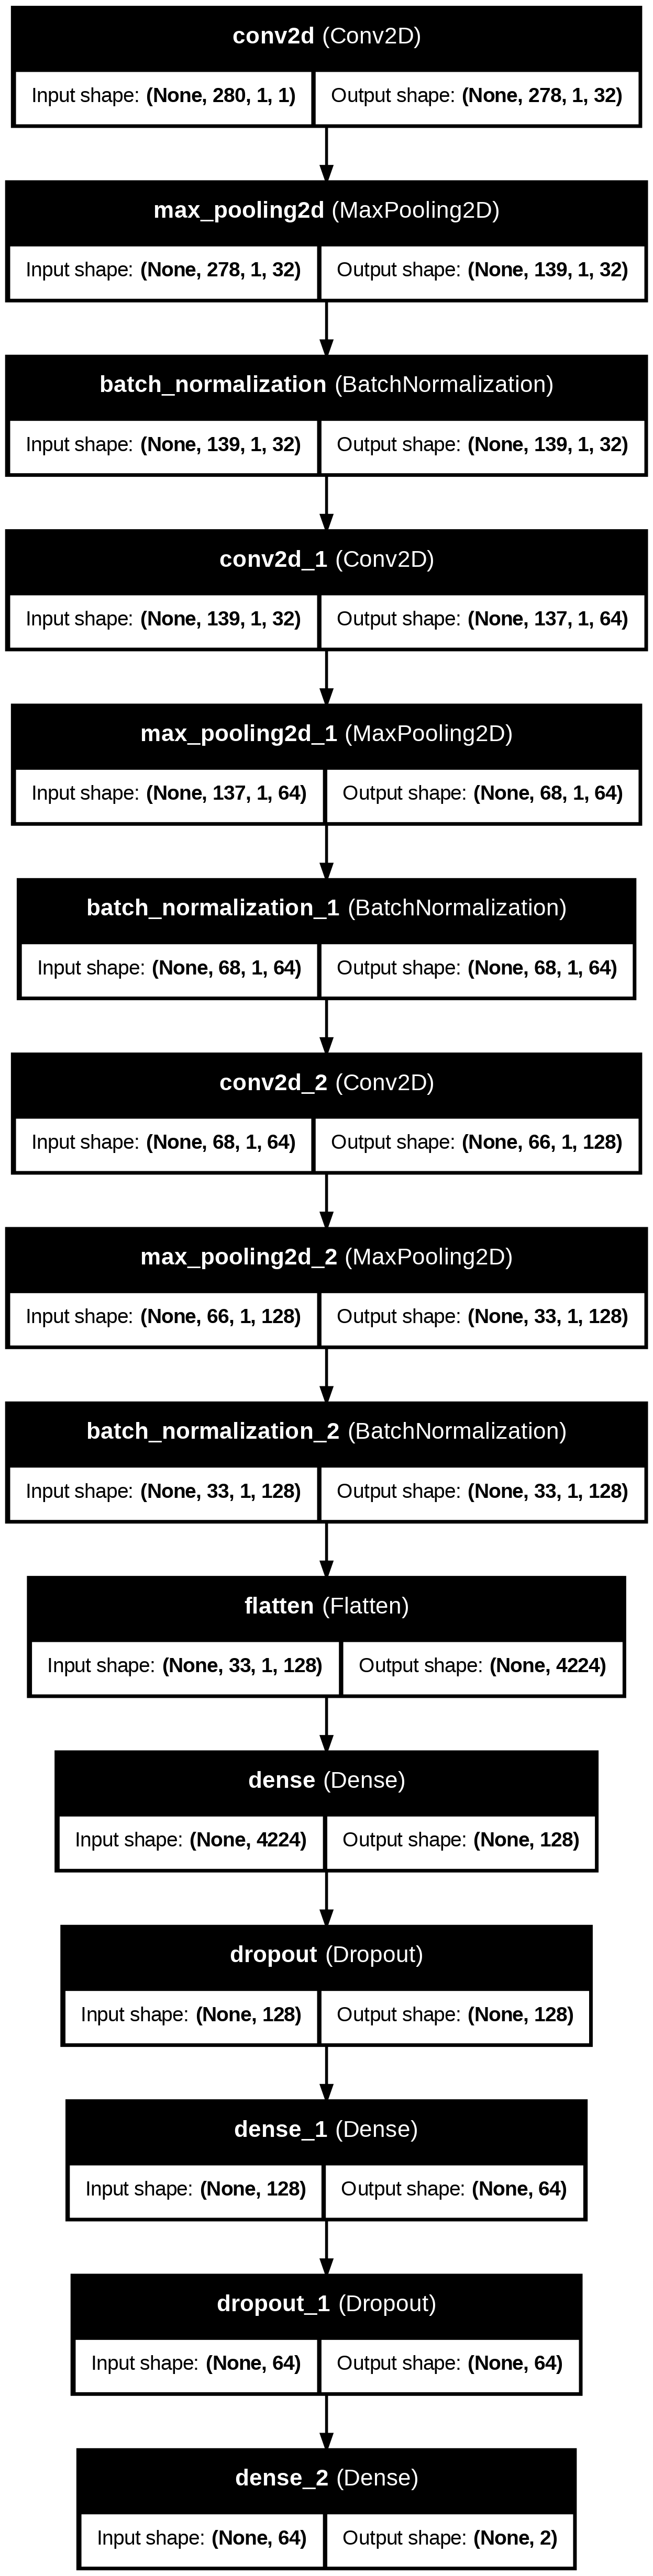

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualisasi CNN model
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Melihat parameter dari SVM model
print(svm_model_no_tuning.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


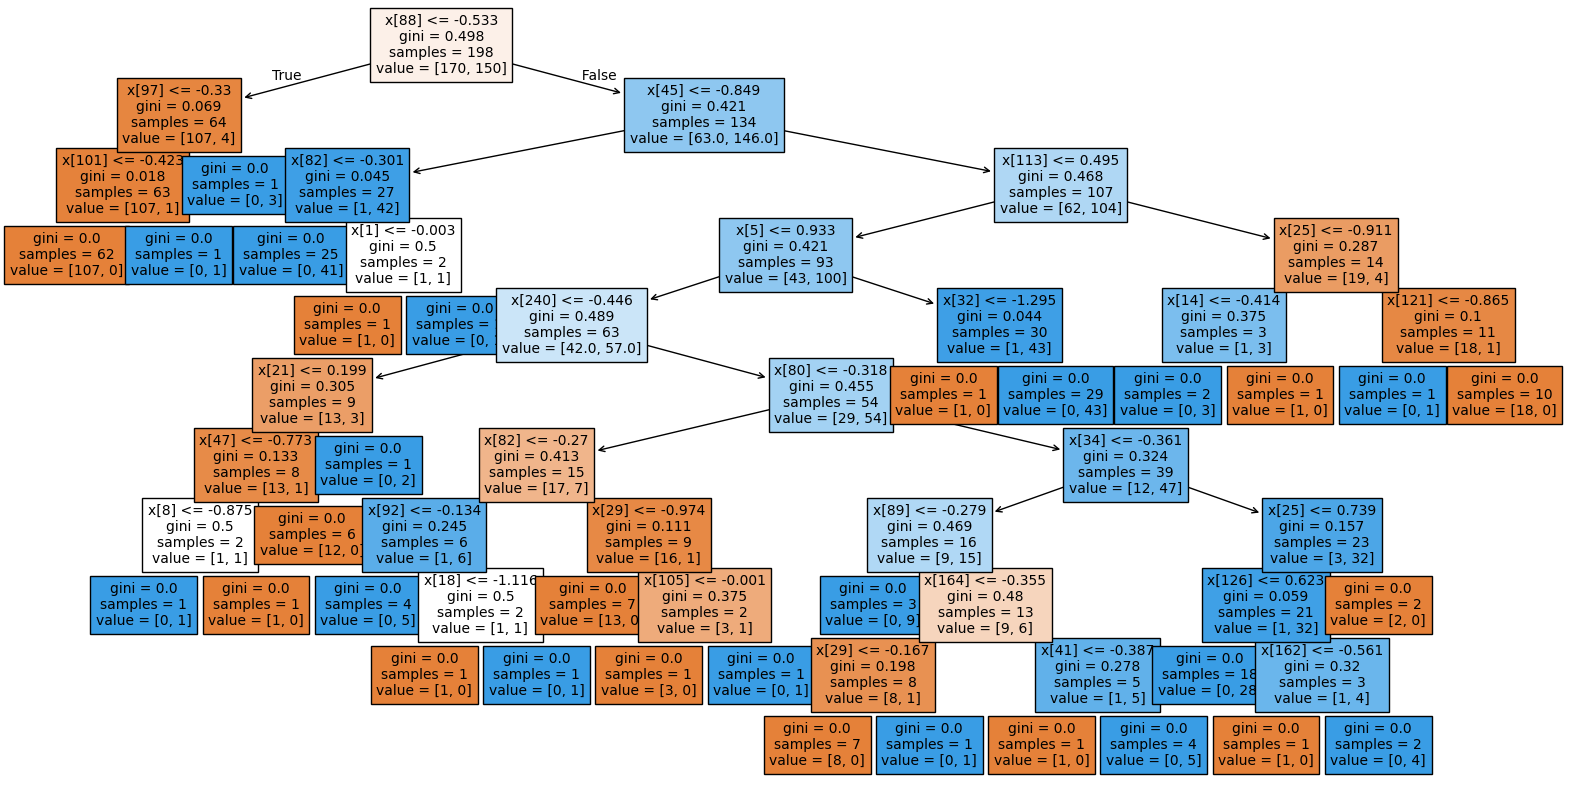

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi satu pohon keputusan dari Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_model_no_tuning.estimators_[0], filled=True, fontsize=10)
plt.show()


In [ ]:
# Melihat parameter dari Random Forest model
print(rf_model_no_tuning.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Melihat parameter dari Meta Learner
print(meta_learner.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Melihat parameter scaler
print(scaler.get_params())

{'copy': True, 'with_mean': True, 'with_std': True}


In [4]:
def predict_single_audio(file_path, cnn_model, svm_model, rf_model, meta_learner, scaler, fixed_length=40):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract features from the audio file
    features = extract_features_from_audio(y, sr, fixed_length=fixed_length)

    # Standardize the features
    features = scaler.transform([features])

    # Prepare the input for the CNN model
    features_cnn = features[..., np.newaxis, np.newaxis]

    # Get the prediction probabilities from each model
    svm_pred_proba = svm_model.predict_proba(features)[0][1]  # Probabilitas kelas "AI"
    rf_pred_proba = rf_model.predict_proba(features)[0][1]    # Probabilitas kelas "AI"
    cnn_pred_proba = cnn_model.predict(features_cnn)[0][1]    # Probabilitas kelas "AI"

    # Stack the probabilities for the meta-learner
    stacked_features = np.array([svm_pred_proba, rf_pred_proba, cnn_pred_proba]).reshape(1, -1)

    # Get the final prediction from the meta-learner
    final_pred_proba = meta_learner.predict_proba(stacked_features)
    final_prediction = meta_learner.predict(stacked_features)

    # Output the prediction and probability
    label_map = {0: "Human", 1: "AI"}
    predicted_label = label_map[final_prediction[0]]
    ai_probability = final_pred_proba[0][1] * 100
    human_probability = final_pred_proba[0][0] * 100

    return final_prediction[0], predicted_label, ai_probability, human_probability

In [5]:
def predict_folder(folder_path, cnn_model, svm_model, rf_model, meta_learner, scaler, fixed_length=40):
    results = []

    # Loop through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder_path, file_name)

            print(f"File: {file_name}")

            # Predict for each audio file
            prediction, label, ai_prob, human_prob = predict_single_audio(
                file_path, cnn_model, svm_model, rf_model, meta_learner, scaler, fixed_length=fixed_length
            )

            # Store the results
            results.append({
                'file_name': file_name,
                'predicted': prediction,
                'label': label,
                'ai_probability': ai_prob,
                'human_probability': human_prob
            })

            # Print the results for each file

            print(f"  Predicted: {prediction}, \"{label}\"")
            print(f"  Probabilities:")
            print(f"    - AI: {ai_prob:.2f}%")
            print(f"    - Human: {human_prob:.2f}%\n")

    return results

In [ ]:
file_path = '/content/Para 5(English Real Audio).wav'
result = predict_single_audio(file_path, cnn_model, svm_model_no_tuning, rf_model_no_tuning, meta_learner, scaler)

print(f"Predicted: {result[0]}, \"{result[1]}\"")
print(f"Probabilities:")
print(f"  - AI: {result[2]:.2f}%")
print(f"  - Human: {result[3]:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: 0, "Human"
Probabilities:
  - AI: 14.92%
  - Human: 85.08%


In [6]:
import os

folder_path = '/content'
results = predict_folder(folder_path, cnn_model, svm_model_no_tuning, rf_model_no_tuning, meta_learner, scaler)

File: human3.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
  Predicted: 0, "Human"
  Probabilities:
    - AI: 2.21%
    - Human: 97.79%

File: human2.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
  Predicted: 0, "Human"
  Probabilities:
    - AI: 1.86%
    - Human: 98.14%

File: ai3.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
  Predicted: 1, "AI"
  Probabilities:
    - AI: 97.40%
    - Human: 2.60%

File: human1.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
  Predicted: 0, "Human"
  Probabilities:
    - AI: 1.59%
    - Human: 98.41%

File: ai4.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  Predicted: 1, "AI"
  Probabilities:
    - AI: 98.47%
    - Human: 1.53%

File: human5.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
  Predicted: 0, "Human"
  Probabilities:
    - AI: 1.63%
    - Human: 98.37%

File: ai1.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  Predicted: 1, "AI"
  Probabilities:
    - AI: 97.71%
    - Human: 2.29%

File: human4.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  Predicted: 0, "Human"
  Proba